In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
# degC = np.array([-40,-10,0,8,15,22,38])
# degF= np.array([-40,14,32,46,59,72,100])
degC = np.array([0.5,2.3,2.9])
degF= np.array([1.4,1.9,3.2])

def gradient_descent_func(init_guess, learning_rate, step_size_limit, max_steps):
    
    SS_list = [] #for plotting intercept vs Sum of Squares scatter plot
    guesses = []
    
    #intialise counters
    guess = init_guess
    step_size = 0
    lr = learning_rate
    step = 0
    m = 0.68 #for statquest dataset
    #m = 1.7979 for degF to degC dataset

    while True: #this block of code is excuted until 1000 iterations or limit of 0.001 is reached on the step_size. Remember Gradient Descent is iterative
        res_squared_array = np.array([]) #initialise array to hold residual squared error functions
        diffs_array = np.array([]) #initialise array to hold diffs array
        for i,j in enumerate(degC):
            c = sp.Symbol ('c') #sympy allows for analytical differentiation returning an expression that can be evaluated along the length of the curve / function
            res_squared = (degF[i] - ((m*j) + c))**2 #calculate square of the difference between observation and predicted value
                                                        #recogise this is the simple case of a linear line in which the slope was given, so we areonl optimising for the intercept
            res_squared_array = np.append(res_squared_array, res_squared) #append the expressions for calculating squared error to an array
            temp = sp.diff(res_squared,c) #for each iteration create a temp variable storing the differentiated form of the squared error
            diffs_array = np.append(diffs_array, temp) #append each differentiated form to an array called diffs_array
        SS = sum(res_squared_array).subs(c,guess) #the native sum function allows for summing the differentials
                                                  #the sum of differentials is then calculated by sustituting the intial guess provided by the user
        print("Sum of Squares: {}".format(SS))    #for observation 
        SS_list.append(SS) #for plotting SS vs intercept
        #diffs_sum = sum(diffs_array)
        dssdc = sum(diffs_array).subs(c,guess) #sum the differentials and substiute the intercept with the guess
        print("d(Sum of Squares)/d(c) : {} ".format(dssdc))
        step_size = dssdc * 0.1
        print("Step Size {}: ".format(step_size))
        print ("Current guess: {}".format(guess))
        guesses.append(guess)
        guess = guess - step_size
        print("Next Guess: {}".format(guess))
        print()
        step = step + 1
        if (abs(step_size) - 0) < step_size_limit:
            print('Solution to c was found as: {} after {} steps'.format(guess, step))
            print ('Correct c for random statquest dataset is 0.87')
            print('given m :{}'.format(m))
            break
        elif step == 1000:
            print("no solution was found")
            break
        else:
            continue
    return guesses,SS_list
#correct c = 0.87

In [2]:
guesses, SS_list = gradient_descent_func(0,0.1,0.001,1000) #(init_guess, learning_rate, step_size_limit, max_steps)

Sum of Squares: 2.74448000000000
d(Sum of Squares)/d(c) : -5.24800000000000 
Step Size -0.524800000000000: 
Current guess: 0
Next Guess: 0.524800000000000

Sum of Squares: 0.816574720000000
d(Sum of Squares)/d(c) : -2.09920000000000 
Step Size -0.209920000000000: 
Current guess: 0.524800000000000
Next Guess: 0.734720000000000

Sum of Squares: 0.508109875200000
d(Sum of Squares)/d(c) : -0.839680000000000 
Step Size -0.0839680000000000: 
Current guess: 0.734720000000000
Next Guess: 0.818688000000000

Sum of Squares: 0.458755500032000
d(Sum of Squares)/d(c) : -0.335872000000000 
Step Size -0.0335872000000000: 
Current guess: 0.818688000000000
Next Guess: 0.852275200000000

Sum of Squares: 0.450858800005120
d(Sum of Squares)/d(c) : -0.134348800000000 
Step Size -0.0134348800000000: 
Current guess: 0.852275200000000
Next Guess: 0.865710080000000

Sum of Squares: 0.449595328000819
d(Sum of Squares)/d(c) : -0.0537395200000006 
Step Size -0.00537395200000006: 
Current guess: 0.865710080000000


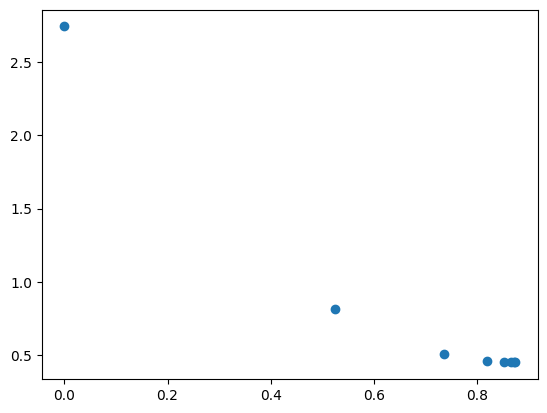

In [13]:
plt.scatter(guesses, SS_list)

In [4]:
guesses

[0,
 0.524800000000000,
 0.734720000000000,
 0.818688000000000,
 0.852275200000000,
 0.865710080000000,
 0.871084032000000,
 0.873233612800000]

In [5]:
SS_list

[2.74448000000000,
 0.816574720000000,
 0.508109875200000,
 0.458755500032000,
 0.450858800005120,
 0.449595328000819,
 0.449393172480131,
 0.449360827596821]

In [6]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

degC = np.array([0.5,2.3,2.9]) #x
degF= np.array([1.4,1.9,3.2])  #y

# degC = np.array([-40,-10,0,8,15,22,38])
# degF= np.array([-40,14,32,46,59,72,100])

guess_m = 1
guess_c = 0
counter = 0
lr = 0.009

ss = np.array([])
m_values = []
c_values = []

while True:
    dummy_m = np.array([])
    dummy_c = np.array([])
    for i,j in enumerate(degC):
        m = sp.Symbol('m')
        c = sp.Symbol('c')
        res_squared = (degF[i] - ((m*j)+c))**2
        temp = res_squared.subs({c: guess_c, m:guess_m})
        ss = np.append(ss, temp)
        m_values.append(guess_m)
        c_values.append(guess_c)
        m_diff_temp= sp.diff(res_squared, m)
        c_diff_temp= sp.diff(res_squared, c)
        dummy_m = np.append(dummy_m, m_diff_temp)
        dummy_c = np.append(dummy_c, c_diff_temp)  
    dssdm = sum(dummy_m).subs({c: guess_c, m:guess_m})
    dssdc = sum(dummy_c).subs({c: guess_c, m:guess_m})
    step_size_m = dssdm * lr
#     if abs(step_size_m) < 0.001:
#         step_size_m = 0
    step_size_c = dssdc * lr
#     if abs(step_size_c) < 0.001:
#         step_size_c = 0
    guess_m = guess_m - step_size_m
    guess_c = guess_c - step_size_c
    counter = counter + 1
    if abs(step_size_m) < 0.001 and abs(step_size_c) < 0.001:
        print('iteration Succesful')
        print(counter)
        print("m : {}".format(guess_m))
        print("c : {}".format(guess_c))
        print("correct values for small 3 example batch is m = 0.68 and c = 0.87")
        break
    elif counter == 1000:
        print('iteration did not converge')
        break
    else:
        continue

iteration Succesful
220
m : 0.681871421156012
c : 0.852848461414634
correct values for small 3 example batch is m = 0.68 and c = 0.87
